In [4]:
# Tony's Notebook for exploring the assignment

Followed this video: https://www.youtube.com/watch?v=Jy4wM2X21u0&t=907s
This guy is solid.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pickle
import matplotlib.pyplot as plt
import string
import math
from tqdm import tqdm  # For nice progress bar!

In [2]:
# Mount drive to get data

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## The Convolutional Neural Network

In [5]:
# Must understand Conv2d to be able to debug/understand this. Will watch lectures soon

class CNN(nn.Module):

    def __init__(self, input_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 8, (3, 3), stride=(1, 1), padding=(1, 1))
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(8, 16, (3, 3), stride=(1, 1), padding=(1, 1))
        self.fc1 = nn.Linear(16*7*7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        #x = x.view(x.size[0], -1)
        x = self.fc1(x)
        return x

In [6]:
# Model number 2. This is simple feedforward, used to just make sure things work.

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
# Implement CONV Net - other conv net
# Must understand Conv2d to be able to debug/understand this. Will watch lectures soon

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.model = torchvision.models.resnet34(pretrained=False)
        self.conv1 = nn.Conv2d(1, 6, 5) # input channel (rgb), output channel, kernel size 
        self.pool = nn.MaxPool2d(2, 2) # define 2x2 stride for max-pooling
        self.conv2 = nn.Conv2d(6, 16, 5) # input channel size = output channel size of previous conv layer
        self.fc1 = nn.Linear(16*11*11, 120) # fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(classes))  
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # activation function does not change size
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*11*11) # -1 tells PyTorch to infer num batches # flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # no activation at end, softmax included in CrossEntropyLoss
        return x





In [8]:
# Basic Check To see if net makes sense. Something is wrong with my CNN.
# DOn't really understand it yet, but this code below should used to just check if
# the inputs and outputs work.


dummy_model = NN(3136, 36)
random_input = torch.randn(64, 3136)
print(dummy_model(random_input).shape)


torch.Size([64, 36])


## Hyper-parameters

In [9]:
# Hyper-parameters
input_channels = 3136
num_classes = 36

BATCH_SIZE = 100
LEARNING_RATE = 0.001
NUM_EPOCHS = 4

## Load and Show Data

In [10]:
alpha_dict = dict(enumerate(string.ascii_lowercase))
print(alpha_dict)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}


In [11]:
def get_label_value(labels):
  """
  This function will return a string representing the label of a picture given
  the array label as input:
  Ex ouput: '1a', '4z' ...
  """
  label_temp = labels.tolist()
  label_temp = [int(x) for x in label_temp]
  number = label_temp[:10].index(1)
  letter = alpha_dict[label_temp[10:].index(1)]

  return str(number) + str(letter)
  


In [12]:
def load_data(filepath):
    loaded_pkl = None
    try:
        with open(filepath, 'rb') as pkl_buffered:
            loaded_pkl = pickle.load(pkl_buffered)
        return loaded_pkl
    except Exception as e:
        print("Error loading data: {}".format(e))
    

In [13]:
train_test_percentage = .3

train_data = load_data("data/images_l.pkl")
train_labels = load_data("data/labels_l.pkl")

# Split train into train and test
old_length_train = len(train_data)
old_length_test = len(train_data)

test_data = train_data[:math.floor(old_length_train*.3)]
train_data = train_data[math.floor(old_length_train*.3):]

test_labels = train_labels[:math.floor(old_length_test*.3)]
train_labels = train_labels[math.floor(old_length_test*.3):]


In [14]:
print(train_data.shape)
print(test_data.shape)

(21000, 56, 56)
(9000, 56, 56)


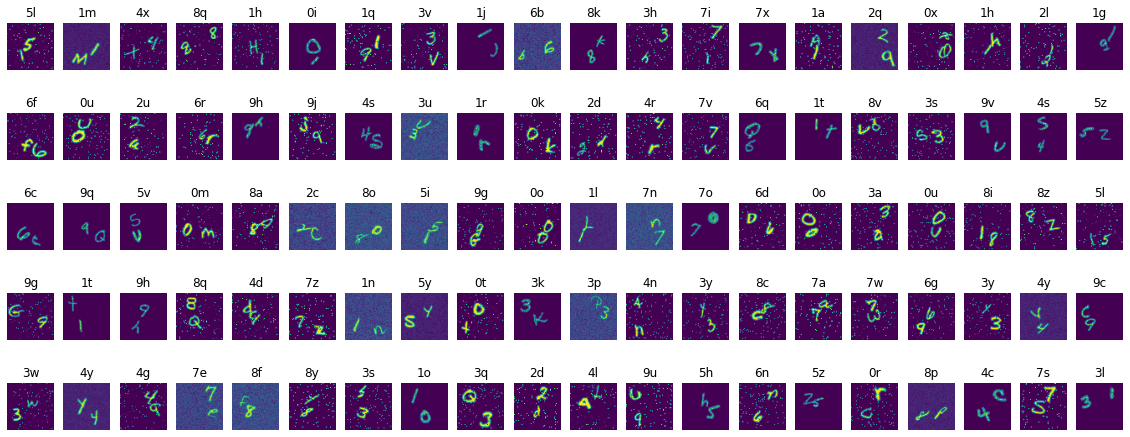

In [15]:
# Visualize some data

figure = plt.figure(figsize=(20, 8))
cols, rows = 20, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img = train_data[sample_idx]
    label = get_label_value(train_labels[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [16]:
# Turn data and labels into a DataLoader
train_loader = DataLoader(TensorDataset(torch.Tensor(train_data),
                                    torch.Tensor(train_labels)), shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(TensorDataset(torch.Tensor(test_data),
                                    torch.Tensor(test_labels)), shuffle=True, batch_size=BATCH_SIZE)



## Define All Classes

In [17]:
# Define classes
classes = []
for l in range(26):
    letter_str = [0.0 for i in range(26)]
    letter_str[l] = 1.0
    for d in range(10):
        digits_str = [0.0 for j in range(10)]
        digits_str[d] = 1.0
        c = digits_str + letter_str
        # c = "".join(c_str)
        classes.append(c)
print(len(classes))

260


## Initialize

In [18]:
model = NN(input_size=input_channels, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

## Train

In [19]:
# Train Network
for epoch in range(NUM_EPOCHS):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Get to correct shape
        data = data.reshape(data.shape[0], -1)

        # forward
        scores = model(data)
        print(scores)
        print(targets)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

 15%|█▌        | 32/210 [00:00<00:01, 166.93it/s]

tensor([[ -4.7134,  -5.4381,  13.9254,  ...,  -3.6404,  12.1466,   2.2617],
        [  8.8877,   2.4318,  -1.9490,  ...,   2.7857,  -1.2766,  -1.6567],
        [ -9.8175,   1.3977,   3.0348,  ...,  -8.2538,  -7.1812,  -4.5472],
        ...,
        [ -3.5111,  10.3894,  -2.5953,  ...,   3.7019,  -2.5962,   5.2834],
        [  4.1354,  15.8461,  -1.2749,  ..., -18.7913,  -5.5928,  -2.8267],
        [ -8.0445,  16.8117,  -7.2039,  ...,  -9.9057,  -8.5364,  -0.7352]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ -3.6176,   0.4612,   9.4657,  ...,   7.4308,  -2.1966,   7.1689],
        [  0.2592,   4.6862,   1.7642,  ...,   2.8711,  -1.9125,   2.6625],
        [  1.2196,   7.4824,  -7.7524,  ...,   5.3633,   4.5246, -11.4106],
        ...,
  

 33%|███▎      | 69/210 [00:00<00:00, 174.17it/s]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0563, -0.0610,  0.1502,  ...,  0.1226,  0.0796,  0.0838],
        [ 0.0563, -0.0610,  0.1502,  ...,  0.1226,  0.0796,  0.0838],
        [ 0.0563, -0.0610,  0.1502,  ...,  0.1226,  0.0796,  0.0838],
        ...,
        [ 0.0563, -0.0610,  0.1502,  ...,  0.1226,  0.0796,  0.0838],
        [ 0.6297, -0.0148,  0.5539,  ..., -0.1941, -0.4793,  0.5688],
        [ 0.0563, -0.0610,  0.1502,  ...,  0.1226,  0.0796,  0.0838]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0569, -0.0602

 41%|████▏     | 87/210 [00:00<00:00, 131.12it/s]

tensor([[ 0.0788, -0.0337,  0.1767,  ...,  0.0998,  0.0550,  0.0561],
        [ 0.0788, -0.0337,  0.1767,  ...,  0.0998,  0.0550,  0.0561],
        [ 0.0788, -0.0337,  0.1767,  ...,  0.0998,  0.0550,  0.0561],
        ...,
        [ 0.0788, -0.0337,  0.1767,  ...,  0.0998,  0.0550,  0.0561],
        [ 0.0788, -0.0337,  0.1767,  ...,  0.0998,  0.0550,  0.0561],
        [ 0.0788, -0.0337,  0.1767,  ...,  0.0998,  0.0550,  0.0561]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
tensor([[ 0.0793, -0.0330,  0.1776,  ...,  0.0990,  0.0545,  0.0552],
        [ 0.0793, -0.0330,  0.1776,  ...,  0.0990,  0.0545,  0.0552],
        [ 0.0793, -0.0330,  0.1776,  ...,  0.0990,  0.0545,  0.0552],
        ...,
        [ 0.0793, -0.0330,  0.1776,  ...,  0.0990,  0.05

 49%|████▊     | 102/210 [00:00<00:00, 124.57it/s]

tensor([[ 0.0927, -0.0193,  0.1943,  ...,  0.0818,  0.0418,  0.0422],
        [ 0.0927, -0.0193,  0.1943,  ...,  0.0818,  0.0418,  0.0422],
        [ 0.0927, -0.0193,  0.1943,  ...,  0.0818,  0.0418,  0.0422],
        ...,
        [ 0.0927, -0.0193,  0.1943,  ...,  0.0818,  0.0418,  0.0422],
        [ 0.0927, -0.0193,  0.1943,  ...,  0.0818,  0.0418,  0.0422],
        [ 0.0927, -0.0193,  0.1943,  ...,  0.0818,  0.0418,  0.0422]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0935, -0.0186,  0.1952,  ...,  0.0809,  0.0410,  0.0418],
        [ 0.0935, -0.0186,  0.1952,  ...,  0.0809,  0.0410,  0.0418],
        [ 0.0935, -0.0186,  0.1952,  ...,  0.0809,  0.0410,  0.0418],
        ...,
        [ 0.0935, -0.0186,  0.1952,  ...,  0.0809,  0.04

 61%|██████▏   | 129/210 [00:00<00:00, 119.93it/s]

tensor([[ 0.1114, -0.0017,  0.2150,  ...,  0.0659,  0.0230,  0.0282],
        [ 0.1114, -0.0017,  0.2150,  ...,  0.0659,  0.0230,  0.0282],
        [ 0.1114, -0.0017,  0.2150,  ...,  0.0659,  0.0230,  0.0282],
        ...,
        [ 0.1114, -0.0017,  0.2150,  ...,  0.0659,  0.0230,  0.0282],
        [ 0.1114, -0.0017,  0.2150,  ...,  0.0659,  0.0230,  0.0282],
        [ 0.2442,  0.1369,  0.1676,  ...,  0.0952,  0.1516, -0.1008]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.1121, -0.0010,  0.2158,  ...,  0.0652,  0.0224,  0.0278],
        [ 0.1121, -0.0010,  0.2158,  ...,  0.0652,  0.0224,  0.0278],
        [ 0.1121, -0.0010,  0.2158,  ...,  0.0652,  0.0224,  0.0278],
        ...,
        [ 0.1121, -0.0010,  0.2158,  ...,  0.0652,  0.02

 79%|███████▉  | 166/210 [00:01<00:00, 148.21it/s]

tensor([[0.1369, 0.0220, 0.2336,  ..., 0.0470, 0.0013, 0.0093],
        [0.1369, 0.0220, 0.2336,  ..., 0.0470, 0.0013, 0.0093],
        [0.1369, 0.0220, 0.2336,  ..., 0.0470, 0.0013, 0.0093],
        ...,
        [0.1369, 0.0220, 0.2336,  ..., 0.0470, 0.0013, 0.0093],
        [0.1369, 0.0220, 0.2336,  ..., 0.0470, 0.0013, 0.0093],
        [0.1369, 0.0220, 0.2336,  ..., 0.0470, 0.0013, 0.0093]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.1379, 0.0226, 0.2341,  ..., 0.0464, 0.0005, 0.0085],
        [0.1379, 0.0226, 0.2341,  ..., 0.0464, 0.0005, 0.0085],
        [0.1379, 0.0226, 0.2341,  ..., 0.0464, 0.0005, 0.0085],
        ...,
        [0.1379, 0.0226, 0.2341,  ..., 0.0464, 0.0005, 0.0085],
        [0.1379, 0.0226, 0.2341,  ..., 0.0464,

  0%|          | 0/210 [00:00<?, ?it/s]

tensor([[ 0.1615,  0.0506,  0.2587,  ...,  0.0261, -0.0189, -0.0179],
        [ 0.1615,  0.0506,  0.2587,  ...,  0.0261, -0.0189, -0.0179],
        [ 0.1615,  0.0506,  0.2587,  ...,  0.0261, -0.0189, -0.0179],
        ...,
        [ 0.1615,  0.0506,  0.2587,  ...,  0.0261, -0.0189, -0.0179],
        [ 0.1615,  0.0506,  0.2587,  ...,  0.0261, -0.0189, -0.0179],
        [ 0.1615,  0.0506,  0.2587,  ...,  0.0261, -0.0189, -0.0179]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.1618,  0.0514,  0.2594,  ...,  0.0255, -0.0192, -0.0184],
        [ 0.1618,  0.0514,  0.2594,  ...,  0.0255, -0.0192, -0.0184],
        [ 0.1618,  0.0514,  0.2594,  ...,  0.0255, -0.0192, -0.0184],
        ...,
        [ 0.1618,  0.0514,  0.2594,  ...,  0.0255, -0.01

 19%|█▊        | 39/210 [00:00<00:00, 191.20it/s]

tensor([[ 0.1868,  0.0775,  0.2784,  ...,  0.0020, -0.0386, -0.0381],
        [ 0.1868,  0.0775,  0.2784,  ...,  0.0020, -0.0386, -0.0381],
        [ 0.1868,  0.0775,  0.2784,  ...,  0.0020, -0.0386, -0.0381],
        ...,
        [ 0.1868,  0.0775,  0.2784,  ...,  0.0020, -0.0386, -0.0381],
        [ 0.1868,  0.0775,  0.2784,  ...,  0.0020, -0.0386, -0.0381],
        [ 0.1868,  0.0775,  0.2784,  ...,  0.0020, -0.0386, -0.0381]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])
tensor([[ 0.1873,  0.0782,  0.2790,  ...,  0.0017, -0.0394, -0.0387],
        [ 0.1873,  0.0782,  0.2790,  ...,  0.0017, -0.0394, -0.0387],
        [ 0.1873,  0.0782,  0.2790,  ...,  0.0017, -0.0394, -0.0387],
        ...,
        [ 0.1873,  0.0782,  0.2790,  ...,  0.0017, -0.03

 38%|███▊      | 80/210 [00:00<00:00, 193.79it/s]

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.2127,  0.1061,  0.3003,  ..., -0.0211, -0.0645, -0.0640],
        [ 0.2127,  0.1061,  0.3003,  ..., -0.0211, -0.0645, -0.0640],
        [ 0.2127,  0.1061,  0.3003,  ..., -0.0211, -0.0645, -0.0640],
        ...,
        [ 0.2127,  0.1061,  0.3003,  ..., -0.0211, -0.0645, -0.0640],
        [ 0.2127,  0.1061,  0.3003,  ..., -0.0211, -0.0645, -0.0640],
        [ 0.2127,  0.1061,  0.3003,  ..., -0.0211, -0.0645, -0.0640]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[ 0.2132,  0.1068

 58%|█████▊    | 121/210 [00:00<00:00, 194.09it/s]

tensor([[ 0.2344,  0.1344,  0.3198,  ..., -0.0415, -0.0895, -0.0858],
        [ 0.2344,  0.1344,  0.3198,  ..., -0.0415, -0.0895, -0.0858],
        [ 0.2344,  0.1344,  0.3198,  ..., -0.0415, -0.0895, -0.0858],
        ...,
        [ 0.2344,  0.1344,  0.3198,  ..., -0.0415, -0.0895, -0.0858],
        [ 0.2344,  0.1344,  0.3198,  ..., -0.0415, -0.0895, -0.0858],
        [ 0.2344,  0.1344,  0.3198,  ..., -0.0415, -0.0895, -0.0858]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.2350,  0.1351,  0.3204,  ..., -0.0422, -0.0901, -0.0864],
        [ 0.2350,  0.1351,  0.3204,  ..., -0.0422, -0.0901, -0.0864],
        [ 0.2350,  0.1351,  0.3204,  ..., -0.0422, -0.0901, -0.0864],
        ...,
        [ 0.2350,  0.1351,  0.3204,  ..., -0.0422, -0.09

 77%|███████▋  | 161/210 [00:00<00:00, 196.49it/s]

tensor([[ 0.2575,  0.1595,  0.3430,  ..., -0.0613, -0.1091, -0.1089],
        [ 0.2575,  0.1595,  0.3430,  ..., -0.0613, -0.1091, -0.1089],
        [ 0.2575,  0.1595,  0.3430,  ..., -0.0613, -0.1091, -0.1089],
        ...,
        [ 0.2575,  0.1595,  0.3430,  ..., -0.0613, -0.1091, -0.1089],
        [ 0.2575,  0.1595,  0.3430,  ..., -0.0613, -0.1091, -0.1089],
        [ 0.2575,  0.1595,  0.3430,  ..., -0.0613, -0.1091, -0.1089]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.2584,  0.1600,  0.3434,  ..., -0.0618, -0.1093, -0.1094],
        [ 0.2584,  0.1600,  0.3434,  ..., -0.0618, -0.1093, -0.1094],
        [ 0.2584,  0.1600,  0.3434,  ..., -0.0618, -0.1093, -0.1094],
        ...,
        [ 0.2584,  0.1600,  0.3434,  ..., -0.0618, -0.10

 96%|█████████▌| 202/210 [00:01<00:00, 197.35it/s]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.2842,  0.1832,  0.3664,  ..., -0.0867, -0.1277, -0.1262],
        [ 0.2842,  0.1832,  0.3664,  ..., -0.0867, -0.1277, -0.1262],
        [ 0.2842,  0.1832,  0.3664,  ..., -0.0867, -0.1277, -0.1262],
        ...,
        [ 0.2842,  0.1832,  0.3664,  ..., -0.0867, -0.1277, -0.1262],
        [ 0.2842,  0.1832,  0.3664,  ..., -0.0867, -0.1277, -0.1262],
        [ 0.2842,  0.1832,  0.3664,  ..., -0.0867, -0.1277, -0.1262]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[ 0.2845,  0.1837

  8%|▊         | 16/210 [00:00<00:01, 158.54it/s]

tensor([[ 0.2949,  0.2058,  0.3875,  ..., -0.1083, -0.1447, -0.1489],
        [ 0.2949,  0.2058,  0.3875,  ..., -0.1083, -0.1447, -0.1489],
        [ 0.2949,  0.2058,  0.3875,  ..., -0.1083, -0.1447, -0.1489],
        ...,
        [ 0.2949,  0.2058,  0.3875,  ..., -0.1083, -0.1447, -0.1489],
        [ 0.2949,  0.2058,  0.3875,  ..., -0.1083, -0.1447, -0.1489],
        [ 0.2949,  0.2058,  0.3875,  ..., -0.1083, -0.1447, -0.1489]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.2953,  0.2063,  0.3879,  ..., -0.1090, -0.1451, -0.1494],
        [ 0.2953,  0.2063,  0.3879,  ..., -0.1090, -0.1451, -0.1494],
        [ 0.2953,  0.2063,  0.3879,  ..., -0.1090, -0.1451, -0.1494],
        ...,
        [ 0.2953,  0.2063,  0.3879,  ..., -0.1090, -0.14

 15%|█▌        | 32/210 [00:00<00:02, 77.16it/s] 

tensor([[ 0.3065,  0.2175,  0.3990,  ..., -0.1236, -0.1579, -0.1578],
        [ 0.3065,  0.2175,  0.3990,  ..., -0.1236, -0.1579, -0.1578],
        [ 0.3065,  0.2175,  0.3990,  ..., -0.1236, -0.1579, -0.1578],
        ...,
        [ 0.3065,  0.2175,  0.3990,  ..., -0.1236, -0.1579, -0.1578],
        [ 0.3065,  0.2175,  0.3990,  ..., -0.1236, -0.1579, -0.1578],
        [ 0.3065,  0.2175,  0.3990,  ..., -0.1236, -0.1579, -0.1578]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3069,  0.2180,  0.3997,  ..., -0.1239, -0.1584, -0.1581],
        [ 0.3069,  0.2180,  0.3997,  ..., -0.1239, -0.1584, -0.1581],
        [ 0.3069,  0.2180,  0.3997,  ..., -0.1239, -0.1584, -0.1581],
        ...,
        [ 0.3069,  0.2180,  0.3997,  ..., -0.1239, -0.15

 34%|███▍      | 71/210 [00:00<00:01, 134.06it/s]

tensor([[ 0.3123,  0.2266,  0.4064,  ..., -0.1339, -0.1655, -0.1613],
        [ 0.3123,  0.2266,  0.4064,  ..., -0.1339, -0.1655, -0.1613],
        [ 0.3123,  0.2266,  0.4064,  ..., -0.1339, -0.1655, -0.1613],
        ...,
        [ 0.3123,  0.2266,  0.4064,  ..., -0.1339, -0.1655, -0.1613],
        [ 0.3123,  0.2266,  0.4064,  ..., -0.1339, -0.1655, -0.1613],
        [ 0.3123,  0.2266,  0.4064,  ..., -0.1339, -0.1655, -0.1613]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[ 0.3127,  0.2272,  0.4069,  ..., -0.1345, -0.1658, -0.1617],
        [ 0.3127,  0.2272,  0.4069,  ..., -0.1345, -0.1658, -0.1617],
        [ 0.3127,  0.2272,  0.4069,  ..., -0.1345, -0.1658, -0.1617],
        ...,
        [ 0.3127,  0.2272,  0.4069,  ..., -0.1345, -0.16

 42%|████▏     | 88/210 [00:00<00:01, 117.07it/s]

tensor([[ 0.3279,  0.2486,  0.4187,  ..., -0.1519, -0.1747, -0.1749],
        [ 0.3279,  0.2486,  0.4187,  ..., -0.1519, -0.1747, -0.1749],
        [ 0.3279,  0.2486,  0.4187,  ..., -0.1519, -0.1747, -0.1749],
        ...,
        [ 0.3279,  0.2486,  0.4187,  ..., -0.1519, -0.1747, -0.1749],
        [ 0.3279,  0.2486,  0.4187,  ..., -0.1519, -0.1747, -0.1749],
        [ 0.3279,  0.2486,  0.4187,  ..., -0.1519, -0.1747, -0.1749]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3283,  0.2493,  0.4192,  ..., -0.1523, -0.1753, -0.1753],
        [ 0.3283,  0.2493,  0.4192,  ..., -0.1523, -0.1753, -0.1753],
        [ 0.3283,  0.2493,  0.4192,  ..., -0.1523, -0.1753, -0.1753],
        ...,
        [ 0.3283,  0.2493,  0.4192,  ..., -0.1523, -0.17

 56%|█████▌    | 118/210 [00:01<00:00, 124.33it/s]

tensor([[ 0.3329,  0.2576,  0.4276,  ..., -0.1612, -0.1838, -0.1851],
        [ 0.3329,  0.2576,  0.4276,  ..., -0.1612, -0.1838, -0.1851],
        [ 0.3329,  0.2576,  0.4276,  ..., -0.1612, -0.1838, -0.1851],
        ...,
        [ 0.3329,  0.2576,  0.4276,  ..., -0.1612, -0.1838, -0.1851],
        [ 0.3329,  0.2576,  0.4276,  ..., -0.1612, -0.1838, -0.1851],
        [ 0.3329,  0.2576,  0.4276,  ..., -0.1612, -0.1838, -0.1851]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3331,  0.2580,  0.4282,  ..., -0.1618, -0.1845, -0.1858],
        [ 0.3331,  0.2580,  0.4282,  ..., -0.1618, -0.1845, -0.1858],
        [ 0.3331,  0.2580,  0.4282,  ..., -0.1618, -0.1845, -0.1858],
        ...,
        [ 0.3331,  0.2580,  0.4282,  ..., -0.1618, -0.18

 73%|███████▎  | 154/210 [00:01<00:00, 149.85it/s]

tensor([[ 0.3427,  0.2723,  0.4412,  ..., -0.1702, -0.2036, -0.2004],
        [ 0.3427,  0.2723,  0.4412,  ..., -0.1702, -0.2036, -0.2004],
        [ 0.3427,  0.2723,  0.4412,  ..., -0.1702, -0.2036, -0.2004],
        ...,
        [ 0.3427,  0.2723,  0.4412,  ..., -0.1702, -0.2036, -0.2004],
        [ 0.3427,  0.2723,  0.4412,  ..., -0.1702, -0.2036, -0.2004],
        [ 0.3427,  0.2723,  0.4412,  ..., -0.1702, -0.2036, -0.2004]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3431,  0.2730,  0.4415,  ..., -0.1703, -0.2044, -0.2010],
        [ 0.3431,  0.2730,  0.4415,  ..., -0.1703, -0.2044, -0.2010],
        [ 0.3431,  0.2730,  0.4415,  ..., -0.1703, -0.2044, -0.2010],
        ...,
        [ 0.3431,  0.2730,  0.4415,  ..., -0.1703, -0.20

 81%|████████  | 170/210 [00:01<00:00, 136.86it/s]


tensor([[ 0.3645,  0.2906,  0.4486,  ..., -0.1862, -0.2186, -0.2218],
        [ 0.3645,  0.2906,  0.4486,  ..., -0.1862, -0.2186, -0.2218],
        [ 0.3645,  0.2906,  0.4486,  ..., -0.1862, -0.2186, -0.2218],
        ...,
        [ 0.3645,  0.2906,  0.4486,  ..., -0.1862, -0.2186, -0.2218],
        [ 0.3645,  0.2906,  0.4486,  ..., -0.1862, -0.2186, -0.2218],
        [ 0.3645,  0.2906,  0.4486,  ..., -0.1862, -0.2186, -0.2218]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3649,  0.2910,  0.4489,  ..., -0.1864, -0.2185, -0.2227],
        [ 0.3649,  0.2910,  0.4489,  ..., -0.1864, -0.2185, -0.2227],
        [ 0.3649,  0.2910,  0.4489,  ..., -0.1864, -0.2185, -0.2227],
        ...,
        [ 0.3649,  0.2910,  0.4489,  ..., -0.1864, -0.2

 88%|████████▊ | 185/210 [00:01<00:00, 128.90it/s]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3735,  0.2996,  0.4562,  ..., -0.1899, -0.2249, -0.2306],
        [ 0.3735,  0.2996,  0.4562,  ..., -0.1899, -0.2249, -0.2306],
        [ 0.3735,  0.2996,  0.4562,  ..., -0.1899, -0.2249, -0.2306],
        ...,
        [ 0.3735,  0.2996,  0.4562,  ..., -0.1899, -0.2249, -0.2306],
        [ 0.3735,  0.2996,  0.4562,  ..., -0.1899, -0.2249, -0.2306],
        [ 0.3735,  0.2996,  0.4562,  ..., -0.1899, -0.2249, -0.2306]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])
tensor([[ 0.3739,  0.2999

  0%|          | 0/210 [00:00<?, ?it/s]

tensor([[ 0.3761,  0.3048,  0.4586,  ..., -0.1935, -0.2271, -0.2331],
        [ 0.3761,  0.3048,  0.4586,  ..., -0.1935, -0.2271, -0.2331],
        [ 0.3761,  0.3048,  0.4586,  ..., -0.1935, -0.2271, -0.2331],
        ...,
        [ 0.3761,  0.3048,  0.4586,  ..., -0.1935, -0.2271, -0.2331],
        [ 0.3761,  0.3048,  0.4586,  ..., -0.1935, -0.2271, -0.2331],
        [ 0.3761,  0.3048,  0.4586,  ..., -0.1935, -0.2271, -0.2331]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])
tensor([[ 0.3765,  0.3054,  0.4589,  ..., -0.1939, -0.2270, -0.2333],
        [ 0.3765,  0.3054,  0.4589,  ..., -0.1939, -0.2270, -0.2333],
        [ 0.3765,  0.3054,  0.4589,  ..., -0.1939, -0.2270, -0.2333],
        ...,
        [ 0.3765,  0.3054,  0.4589,  ..., -0.1939, -0.22

 15%|█▌        | 32/210 [00:00<00:01, 156.48it/s]

tensor([[ 0.3858,  0.3176,  0.4685,  ..., -0.2034, -0.2298, -0.2410],
        [ 0.3858,  0.3176,  0.4685,  ..., -0.2034, -0.2298, -0.2410],
        [ 0.3858,  0.3176,  0.4685,  ..., -0.2034, -0.2298, -0.2410],
        ...,
        [ 0.3858,  0.3176,  0.4685,  ..., -0.2034, -0.2298, -0.2410],
        [ 0.3858,  0.3176,  0.4685,  ..., -0.2034, -0.2298, -0.2410],
        [ 0.3858,  0.3176,  0.4685,  ..., -0.2034, -0.2298, -0.2410]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])
tensor([[ 0.3861,  0.3181,  0.4689,  ..., -0.2038, -0.2299, -0.2417],
        [ 0.3861,  0.3181,  0.4689,  ..., -0.2038, -0.2299, -0.2417],
        [ 0.3861,  0.3181,  0.4689,  ..., -0.2038, -0.2299, -0.2417],
        ...,
        [ 0.3861,  0.3181,  0.4689,  ..., -0.2038, -0.22

 25%|██▌       | 53/210 [00:00<00:00, 178.66it/s]

tensor([[ 0.3946,  0.3320,  0.4752,  ..., -0.2102, -0.2336, -0.2547],
        [ 0.3946,  0.3320,  0.4752,  ..., -0.2102, -0.2336, -0.2547],
        [ 0.3946,  0.3320,  0.4752,  ..., -0.2102, -0.2336, -0.2547],
        ...,
        [ 0.3946,  0.3320,  0.4752,  ..., -0.2102, -0.2336, -0.2547],
        [ 0.3946,  0.3320,  0.4752,  ..., -0.2102, -0.2336, -0.2547],
        [ 0.3946,  0.3320,  0.4752,  ..., -0.2102, -0.2336, -0.2547]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.3949,  0.3321,  0.4753,  ..., -0.2105, -0.2337, -0.2554],
        [ 0.3949,  0.3321,  0.4753,  ..., -0.2105, -0.2337, -0.2554],
        [ 0.3949,  0.3321,  0.4753,  ..., -0.2105, -0.2337, -0.2554],
        ...,
        [ 0.3949,  0.3321,  0.4753,  ..., -0.2105, -0.23

 42%|████▏     | 89/210 [00:00<00:00, 139.72it/s]

tensor([[ 0.4012,  0.3360,  0.4767,  ..., -0.2196, -0.2399, -0.2629],
        [ 0.4012,  0.3360,  0.4767,  ..., -0.2196, -0.2399, -0.2629],
        [ 0.4012,  0.3360,  0.4767,  ..., -0.2196, -0.2399, -0.2629],
        ...,
        [ 0.4012,  0.3360,  0.4767,  ..., -0.2196, -0.2399, -0.2629],
        [ 0.4012,  0.3360,  0.4767,  ..., -0.2196, -0.2399, -0.2629],
        [ 0.4012,  0.3360,  0.4767,  ..., -0.2196, -0.2399, -0.2629]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.4014,  0.3363,  0.4769,  ..., -0.2203, -0.2402, -0.2630],
        [ 0.4014,  0.3363,  0.4769,  ..., -0.2203, -0.2402, -0.2630],
        [ 0.4014,  0.3363,  0.4769,  ..., -0.2203, -0.2402, -0.2630],
        ...,
        [ 0.4014,  0.3363,  0.4769,  ..., -0.2203, -0.24

 60%|█████▉    | 125/210 [00:00<00:00, 150.77it/s]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.4071,  0.3478,  0.4886,  ..., -0.2303, -0.2522, -0.2679],
        [ 0.4071,  0.3478,  0.4886,  ..., -0.2303, -0.2522, -0.2679],
        [ 0.4071,  0.3478,  0.4886,  ..., -0.2303, -0.2522, -0.2679],
        ...,
        [ 0.4071,  0.3478,  0.4886,  ..., -0.2303, -0.2522, -0.2679],
        [ 0.4071,  0.3478,  0.4886,  ..., -0.2303, -0.2522, -0.2679],
        [ 0.4071,  0.3478,  0.4886,  ..., -0.2303, -0.2522, -0.2679]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 1.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.4073,  0.3484

 84%|████████▍ | 176/210 [00:01<00:00, 135.89it/s]

tensor([[ 0.4163,  0.3632,  0.5017,  ..., -0.2360, -0.2662, -0.2782],
        [ 0.4163,  0.3632,  0.5017,  ..., -0.2360, -0.2662, -0.2782],
        [ 0.4163,  0.3632,  0.5017,  ..., -0.2360, -0.2662, -0.2782],
        ...,
        [ 0.4163,  0.3632,  0.5017,  ..., -0.2360, -0.2662, -0.2782],
        [ 0.4163,  0.3632,  0.5017,  ..., -0.2360, -0.2662, -0.2782],
        [ 0.4163,  0.3632,  0.5017,  ..., -0.2360, -0.2662, -0.2782]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.4166,  0.3634,  0.5020,  ..., -0.2361, -0.2666, -0.2784],
        [ 0.4166,  0.3634,  0.5020,  ..., -0.2361, -0.2666, -0.2784],
        [ 0.4166,  0.3634,  0.5020,  ..., -0.2361, -0.2666, -0.2784],
        ...,
        [ 0.4166,  0.3634,  0.5020,  ..., -0.2361, -0.26

 91%|█████████▏| 192/210 [00:01<00:00, 141.50it/s]

tensor([[ 0.4261,  0.3786,  0.5105,  ..., -0.2452, -0.2792, -0.2875],
        [ 0.4261,  0.3786,  0.5105,  ..., -0.2452, -0.2792, -0.2875],
        [ 0.4261,  0.3786,  0.5105,  ..., -0.2452, -0.2792, -0.2875],
        ...,
        [ 0.4261,  0.3786,  0.5105,  ..., -0.2452, -0.2792, -0.2875],
        [ 0.4261,  0.3786,  0.5105,  ..., -0.2452, -0.2792, -0.2875],
        [ 0.4261,  0.3786,  0.5105,  ..., -0.2452, -0.2792, -0.2875]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.4264,  0.3793,  0.5106,  ..., -0.2455, -0.2794, -0.2880],
        [ 0.4264,  0.3793,  0.5106,  ..., -0.2455, -0.2794, -0.2880],
        [ 0.4264,  0.3793,  0.5106,  ..., -0.2455, -0.2794, -0.2880],
        ...,
        [ 0.4264,  0.3793,  0.5106,  ..., -0.2455, -0.27

100%|██████████| 210/210 [00:01<00:00, 131.39it/s]

tensor([[ 0.4364,  0.3876,  0.5120,  ..., -0.2593, -0.2841, -0.2949],
        [ 0.4364,  0.3876,  0.5120,  ..., -0.2593, -0.2841, -0.2949],
        [ 0.4364,  0.3876,  0.5120,  ..., -0.2593, -0.2841, -0.2949],
        ...,
        [ 0.4364,  0.3876,  0.5120,  ..., -0.2593, -0.2841, -0.2949],
        [ 0.4364,  0.3876,  0.5120,  ..., -0.2593, -0.2841, -0.2949],
        [ 0.4364,  0.3876,  0.5120,  ..., -0.2593, -0.2841, -0.2949]],
       grad_fn=<AddmmBackward0>)
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.4366,  0.3878,  0.5122,  ..., -0.2598, -0.2844, -0.2950],
        [ 0.4366,  0.3878,  0.5122,  ..., -0.2598, -0.2844, -0.2950],
        [ 0.4366,  0.3878,  0.5122,  ..., -0.2598, -0.2844, -0.2950],
        ...,
        [ 0.4366,  0.3878,  0.5122,  ..., -0.2598, -0.28

## Test

In [20]:

def transform_output(scores):
    """
    Input a Tensor and output will be another Tensor with same dimension but with all elements 0 except two.
    Those 2 elements will have value of 1 and will correspond to the models prediction about which letter and number
    is in the image.
    :param scores:
    :return:
    """
    return_array = []
    score_list = scores.tolist()

    for score in score_list:
        numbers = score[:10]
        letters = score[10:]
        test = lambda x, max_value : 1 if x >= max_value else 0

        new_numbers = [test(x, max(numbers)) for x in numbers]
        new_letters = [test(x, max(letters)) for x in letters]

        return_array.append(new_numbers + new_letters)

    return torch.Tensor(return_array)

In [21]:
# Check accuracy on training & test to see how good our model
def get_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)

            predictions = transform_output(scores)

            temp = (predictions == y)
            results = [all(el) for el in temp]

            num_correct += sum(results)
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples

In [22]:
# This actually runs the tests on train and test set.

print(f"Accuracy on training set: {get_accuracy(train_loader, model) * 100:.2f}%")
print(f"Accuracy on test set: {get_accuracy(test_loader, model) * 100:.2f}%")

Accuracy on training set: 0.35%
Accuracy on test set: 0.43%


## Save Predictions to CSV

In [ ]:
# Will most likely incorporate this into get_accuracy function.
# TODO: make get_acuracy function return an array where the first element is acuracyt and second is the predictions.